In [1]:
import marimo as mo
import numpy as np
import cv2
import easyocr
import matplotlib.pyplot as plt
import urllib

from utils import (
    url_to_image,
    print_result,
    cleanup_text,
    group_boxes_by_lines,
    put_results_on_image,
)


In [2]:
image = url_to_image('https://diafilmy.su/uploads/posts/2019-07/1564381098_pict-jimkpp-49.jpg')
reader = easyocr.Reader(['ru'], recog_network='cyrillic_g1') # this needs to run only once to load the model into memory
result = reader.readtext(image)

3 12


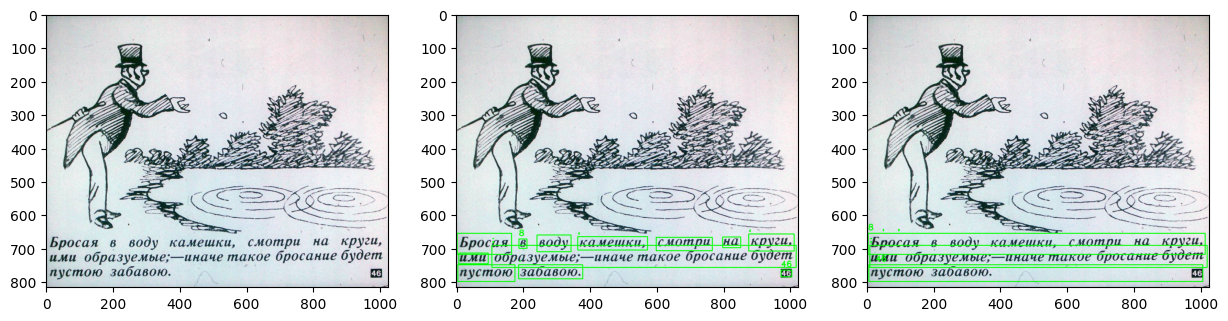

In [3]:
lines = group_boxes_by_lines(result)
print(len(lines), len(result))
image_basic = put_results_on_image(result, image)
image_res = put_results_on_image(lines, image)

fig, axes = plt.subplots(1,3, figsize=(15,5))                         
axes[0].imshow(image)
axes[1].imshow(image_basic)
axes[2].imshow(image_res)
plt.show()

(1284, 1692, 3)


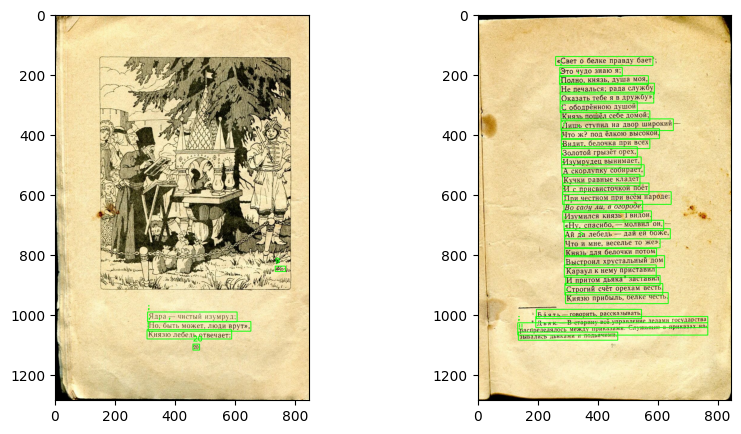

In [7]:
image = url_to_image('https://yandex-images.clstorage.net/hi9J5f450/ae523cX-S/5OcSLy37rFR7UE4sW47XGpXJHUPvQDoYir8bRrQNiRyrT8Y9R0rzdkteUly7i01wAQqAe1vEN2zdTQTZuIQSjqHro3clkuFVJkkbBSKS1w7E5TRzh3B6TbrKFy79bbnERr9b0P_-IrbCmv4ssvoUASA3kWbufFYRJA0l2ZVtR_o8o-sSdJ-QvMMIYoSO-rNaOKVRz8McdtVuK8v_RMC9sCqPY5A_pnL6zn7iUHrW5HVNQ51utjGeocANEQkZwZdOdL-HHgzvCLDfzOagEiJ_KkwloSPTRKbBWptTN7SI4ShuWwPQj0r2GkIqJkR6npCp0a_pmiINWpk8iUldJT335ozjm1rUn8woa1BSTFIWc1rQydmjDwQCNYqjL3ewvN188jfvkCcaCroSggLABiJgDRXr-Z4e3WqpAE0NXfUtS06AD49qhP_oBKOo_mCGXnMinJmhox8cciWKP5-vAAxtXA6XjxCTxlJ2ngZukC4WoPERgxW68o2GMbCpJVVFJXvSIM9D8ixPmDxDmFrETpJrbpDVuWuHnOLlhu-Xr7AAuQAmvweYFxoyhsJiygweekgxGUNlktpdEtnQqanB4XWDqiD_Bx4gdzywbwyGhNoGVxK4YeWn28RO8XI3xxOsdGVctn-b7EemJg4OntbMqiooyemrkXK6UZI5xEmdWZlFb94kq7_yyAfAhONEEthe0gMaBOmxXxdomsFuQxe_GARREP4_C3Cr7mb24q5a6HbumHXN6w2KutVCkbg5ad29cZ-qEL_PQnTraFjbCB60vnq7BphZNSOXjAIt4l_T_0CkOei-63NcYyouOpYmJtA-flgN8af1hiJlcm2kEbnRwSXvcmQbF_ow4wiQN7gObHKePzb8RSknQ2gqGX4Pb5OcaJ2Ifq9riN8KetpOJlKE_qZczeW34W52YXJR3HEVkQW5V1psCwsutMME7CPIFmBS9kdK4CW1y5OMOsUG50M33Ihc')
print(image.shape)
pages = [
    image[:,:image.shape[1]//2,:],
    image[:,image.shape[1]//2:,:]
]
lines = [
    group_boxes_by_lines(
        reader.readtext(image)
    ) for image in pages]
pages_processed = [
    put_results_on_image(
        group_boxes_by_lines(
            reader.readtext(image)
        ), image
    ) for image in pages
]
fig, axes = plt.subplots(1,2, figsize=(10,5))                         
axes[0].imshow(pages_processed[0])
axes[1].imshow(pages_processed[1])
plt.show()